In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib as pl
import unicodedata,re
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:

directory =pl.Path(r"C:\Users\Sulav Poudel\Desktop\AILAB\lab3\archive")


def clean_txt(text):
    text = unicodedata.normalize("NFC", text)
    text = re.sub(r"\s", " ", text).strip()
    return text

data =[]

for item in directory.iterdir():
    if not item.is_dir():
        continue
    
    label = item.name
    
    for file in item.rglob("*.txt"):
        try:
            text = file.read_text(encoding="utf-8")
        except UnicodeDecodeError:
            text = file.read_text(encoding="utf-8", errors="ignore")
        
        text = clean_txt(text)
        
        if text: 
            data.append({
                "text": text,
                "label": label
            })

df = pd.DataFrame(data)

print(df.head())

                                                text         label
0  घर जग्गा कारोबारमा आत्मविश्वास गुमेको वर्ष"बैं...  ArthaBanijya
1  सहायताको प्राथमिकता तोक्न आयोजना बैंकप्राथमिकत...  ArthaBanijya
2  व्यापारीको बेइमानीले सर्वसाधारणलाई सास्तीपेट्र...  ArthaBanijya
3  मोबाइल सेट आयातमा टाइप एप्रुभल लागूसरकारले मोब...  ArthaBanijya
4  रारामा रिसोर्ट र पर्यटक सेवा केन्द्र बन्नेदेशक...  ArthaBanijya


In [3]:
X=df['text']
y=df['label']



In [4]:
category_names=df['label'].unique()
category_names

array(['ArthaBanijya', 'Bichar', 'Desh', 'Khelkud', 'Manoranjan',
       'Prabas', 'Sahitya', 'SuchanaPrabidhi', 'Swasthya', 'Viswa'],
      dtype=object)

In [5]:
value_count=df['label'].value_counts()
value_count

label
ArthaBanijya       1000
Bichar             1000
Desh               1000
Khelkud            1000
Manoranjan         1000
Prabas             1000
Sahitya            1000
SuchanaPrabidhi    1000
Swasthya           1000
Viswa              1000
Name: count, dtype: int64

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,y_train.shape

((8000,), (8000,))

In [7]:
X_test.shape

(2000,)

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [9]:
nb_model= make_pipeline(TfidfVectorizer(),MultinomialNB())
nb_model.fit(X_train,y_train)
y_preds=nb_model.predict(X_test)
print(accuracy_score(y_test,y_preds))
print(classification_report(y_test,y_preds))

0.724
                 precision    recall  f1-score   support

   ArthaBanijya       0.75      0.81      0.78       208
         Bichar       0.38      0.99      0.55       202
           Desh       0.92      0.53      0.67       192
        Khelkud       0.98      0.91      0.94       201
     Manoranjan       0.72      0.62      0.67       209
         Prabas       0.84      0.61      0.71       186
        Sahitya       0.72      0.56      0.63       211
SuchanaPrabidhi       0.97      0.73      0.83       204
       Swasthya       0.93      0.83      0.88       212
          Viswa       0.84      0.62      0.71       175

       accuracy                           0.72      2000
      macro avg       0.80      0.72      0.74      2000
   weighted avg       0.80      0.72      0.74      2000



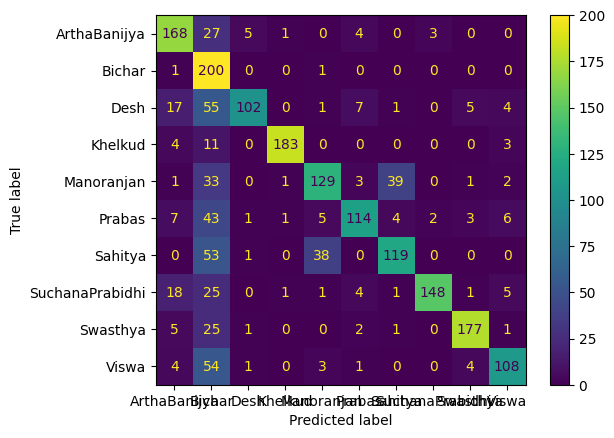

In [10]:
cm=confusion_matrix(y_test,y_preds)
cm_plot=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=df['label'].unique())
cm_plot.plot()
plt.savefig('cm.png')
plt.show()

In [11]:
import joblib 
joblib.dump(nb_model,'hello.joblib')
print('sucess')

sucess


In [12]:
text=["वर्षासँगै हिमपात हिमपातले दर्जन गाँउ प्रभावित   लामो समयपछि शनिबार राति परेको पानीसँगै दार्चुलाका उच्च पहाडी भेगमा हिमपात भएको छ  आइतबार बिहानैबाट हिमपात भएको स्थानीयले बताएका छन्      "
]
predictions=nb_model.predict(text)
for text,predictions in zip(text,predictions):
    print(f'Text:{text}\nPredicted Category:{predictions}')

Text:वर्षासँगै हिमपात हिमपातले दर्जन गाँउ प्रभावित   लामो समयपछि शनिबार राति परेको पानीसँगै दार्चुलाका उच्च पहाडी भेगमा हिमपात भएको छ  आइतबार बिहानैबाट हिमपात भएको स्थानीयले बताएका छन्      
Predicted Category:Desh
